In [200]:
%pip install -q otter-grader

In [201]:
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    ! git clone https://github.com/tanish738/CDA-HW2-TESTS.git tests
    import otter
    grader = otter.Notebook()
else:
    print("Not running in Colab")


fatal: destination path 'tests' already exists and is not an empty directory.


In [202]:
import otter
grader = otter.Notebook()

# Assignment Summary

In this assignment, we explored and implemented several **fundamental machine learning algorithms from scratch**.  
Each method approached classification differently, giving us insights into linear, tree-based, instance-based, and anomaly-detection models.  

---

## Distribution of Problems Solved

1. **Logistic Regression**  
   - Implemented sigmoid, cost function, gradient computation, parameter updates, and prediction.  
   - Learned how linear models classify data using probabilities and decision boundaries.  

2. **One-Class SVM**  
   - Implemented anomaly detection for imbalanced datasets.  
   - Learned how to separate “normal” data from potential outliers using a margin-based approach.  

3. **Decision Trees**  
   - Implemented Gini impurity and best-split search.  
   - Understood how recursive partitioning builds interpretable, rule-based models.  

4. **K-Nearest Neighbors (KNN)**  
   - Implemented distance calculation, neighbor search, and majority voting.  
   - Learned how instance-based models adapt to complex, non-linear decision boundaries.  

---

# Logistic Regression from Scratch (Binary Classification)

## Assignment Overview
In this assignment, you will implement a **binary logistic regression classifier** entirely from scratch using **Python** and the **NumPy** library.  

The goal is to **classify data points into one of two distinct classes** (0 or 1) by learning the underlying decision boundary.  
This exercise will strengthen your understanding of the **mathematics and mechanics** behind one of the most fundamental machine learning algorithms.  

---

## Learning Objectives
By completing this assignment, you will:
- Understand how logistic regression works under the hood.
- Implement essential components step by step:
  1. **Sigmoid function** – to map raw scores into probabilities.  
  2. **Cost function** – binary cross-entropy loss.  
  3. **Gradient computation** – calculate how to adjust parameters.  
  4. **Gradient Descent update rule** – iteratively optimize model parameters.  
  5. **Prediction function** – classify samples based on learned weights.  
- Train and evaluate your logistic regression classifier on a dataset.  


# of training examples =  100
# of features =  2


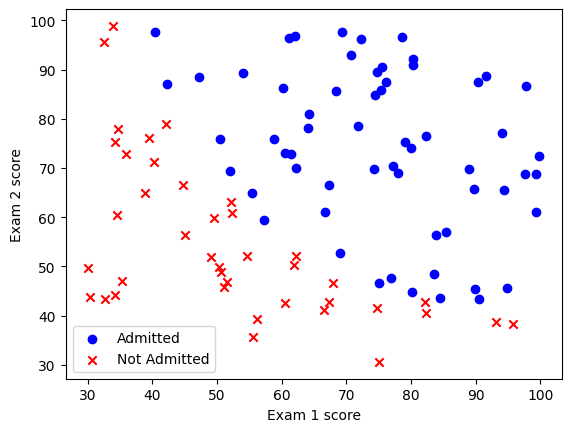

In [203]:
import sys
import numpy as np
import matplotlib.pyplot as plt
!curl -so p0_data.txt "https://dl.dropboxusercontent.com/scl/fi/8rhvgae0al2s9z9oabxoo/p0_data.txt?rlkey=bj4nbz4q013vz0aic2rs7xixn"
data = np.loadtxt('p0_data.txt', delimiter=',')

train_X = data[:, 0:2]
train_y = data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [204]:
def sigmoid(z: int)-> float:
    """
      Sigmoid function
       Parameters
    ----------
    z : float or numpy.ndarray
        The input value(s) for which the sigmoid is to be calculated. The function is designed to handle both single numerical values and NumPy arrays.

    Returns
    -------
    float or numpy.ndarray
        The result of the sigmoid calculation. The output will be of the same type as the input `z`, with all values mapped to the range (0, 1).
    """
    # ****** ENTER CODE  ******
    s = 1 / (1 + np.exp(-z))
    return s
    # ****** END CODE  ******


In [205]:
grader.check("q1")

q1 results: All test cases passed!

# Logistic Regression Cost Function

We will implement the **Binary Cross-Entropy Loss** (Log Loss) for logistic regression.

1. **Use the sigmoid function** for predictions:  
2. **Clip predicted probabilities** to avoid `log(0)` errors:  
3. **Compute the average loss** over all training examples:

In [206]:
def cost_function(theta: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
    """ Logistic regression cost function
    Hint: clip h to avoid log(0).
     Parameters
    ----------
    theta : numpy.ndarray
        The model's parameters (weights and bias) with shape (n_features + 1,).

    X : numpy.ndarray
        The feature matrix with shape (m_samples, n_features + 1).

    y : numpy.ndarray
        The target vector containing the true labels (0s and 1s) with shape (m_samples,).

    Returns
    -------
    float
        The computed logistic regression cost, a single scalar value.
    """

    m = len(y)
    # ****** ENTER CODE  ******
    m = len(y)

    # predictions using sigmoid
    h = sigmoid(X @ theta)

    # clip values to avoid log(0)
    h = np.clip(h, 1e-10, 1 - 1e-10)

    # compute binary cross-entropy loss
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    return cost
    # ****** END CODE  ******

In [207]:
grader.check("q2")

q2 results: All test cases passed!

# Gradient Update

To compute the gradient of the loss function with respect to the parameters:

1. **Subtract actual labels from predictions:**  
2. **Multiply by the feature matrix transpose:**  
3. **Divide by the number of examples (m):**  


In [208]:
def gradient_update(theta: np.ndarray, X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """ Gradient for logistic regression
    Parameters
    ----------
    theta : numpy.ndarray
        The model's current parameters (weights and bias) with shape `(n_features + 1,)`.

    X : numpy.ndarray
        The feature matrix with shape `(m_samples, n_features + 1)`.

    y : numpy.ndarray
        The target vector containing the true labels (0s and 1s) with shape `(m_samples,)`.

    Returns
    -------
    numpy.ndarray
        The computed gradient vector with the same shape as `theta`, `(n_features + 1,)`.

    """
    m = len(y)
    # ****** ENTER CODE  ******
    # predictions
    h = sigmoid(X @ theta)

    # gradient
    grad = (1 / m) * (X.T @ (h - y))

    return grad
    # ****** END CODE  ******



In [209]:
grader.check("q3")

q3 results: All test cases passed!

# Gradient Descent Algorithm

In each iteration of Gradient Descent we do two key updates:

1. **Gradient Update**  
   - Compute the gradient of the loss function w.r.t. the parameters.  

2. **Parameter Update**  
   - Update parameters in the opposite direction of the gradient:  



In [210]:
def gradient_descent(theta, X, y, alpha, max_iterations, print_iterations):
    """ Batch gradient descent algorithm """
    iteration = 0
    prev_cost = float('inf')  # Track previous cost

    while iteration < max_iterations:
        iteration += 1
        #  ***** ENTER YOUR CODE *****
        grad = gradient_update(theta, X, y)     # compute gradient
        theta = theta - alpha * grad
        # ****** END CODE  ******

        # For every print_iterations number of iterations
        if iteration % print_iterations == 0 or iteration == 1:
            cost = cost_function(theta, X, y)
            print("[ Iteration", iteration, "]", "cost =", cost)

            # Visualization
            plt.figure(figsize=(5, 4))
            plt.xlim([20,110])
            plt.ylim([20,110])

            pos = np.where(y == 1)
            neg = np.where(y == 0)

            # Plot original data
            plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
            plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Admitted', 'Not Admitted'])

            # Plot decision boundary
            t = np.linspace(20, 110, 100)
            if abs(theta[2]) > 1e-6:
                decision_boundary = -(theta[0] + theta[1] * t) / theta[2]
                mask = (decision_boundary >= 20) & (decision_boundary <= 110)
                if np.any(mask):
                    plt.plot(t[mask], decision_boundary[mask], c='g', linewidth=2, label='Decision Boundary')

            plt.title(f'Iteration {iteration}')
            plt.show()
        # Early stopping if cost stops improving significantly
        if iteration > 1000 and abs(prev_cost - cost) < 1e-6:
            print(f"Converged at iteration {iteration}")
            break

        prev_cost = cost

    return theta


In [211]:
grader.check("q4")

q4 results: All test cases passed!

# Predict Function (Logistic Regression)
### Steps:
1. Compute probabilities using the **sigmoid function**:  

2. Apply **threshold at 0.5**:  
   - If \( h >= 0.5 \) → predict **1**  
   - If \( h < 0.5 \) → predict **0**



## Theory Question 1 - Accuracy of Logistic Regression
Feel Free to change the parameters : [Hint - Use the visualization to get insights of data]
- The accuracy expected is 90 and you might have to change the parameters to get this
- This will be manaully graded we will also check the fit of the line in the graphs
- In the submission for this question you need to present all the graphs basically the output of the cell below after it is executed


In [230]:
def gradient_descent(theta, X, y, alpha, max_iterations, print_iterations):
    """ Batch gradient descent algorithm with visualization """
    iteration = 0
    prev_cost = float('inf')

    while iteration < max_iterations:
        iteration += 1
        grad = gradient_update(theta, X, y)
        theta = theta - alpha * grad

        if iteration % print_iterations == 0 or iteration == 1:
            cost = cost_function(theta, X, y)
            print("[ Iteration", iteration, "]", "cost =", cost)

            # Visualization (scaled space: [0,1])
            plt.figure(figsize=(5, 4))
            plt.xlim([0, 1])
            plt.ylim([0, 1])

            pos = np.where(y == 1)
            neg = np.where(y == 0)

            # Plot scaled data
            plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
            plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
            plt.xlabel('Exam 1 (scaled)')
            plt.ylabel('Exam 2 (scaled)')
            plt.legend(['Admitted', 'Not Admitted'])

            # Decision boundary
            t = np.linspace(0, 1, 100)
            if abs(theta[2]) > 1e-6:
                decision_boundary = -(theta[0] + theta[1] * t) / theta[2]
                mask = (decision_boundary >= 0) & (decision_boundary <= 1)
                if np.any(mask):
                    plt.plot(t[mask], decision_boundary[mask], c='g', linewidth=2, label='Decision Boundary')

            plt.title(f'Iteration {iteration}')
            plt.tight_layout()
            plt.show()

        if iteration > 1000 and abs(prev_cost - cost) < 1e-6:
            print(f"Converged at iteration {iteration}")
            break

        prev_cost = cost

    return theta


Data shape with bias: (100, 3)
[ Iteration 1 ] cost = 0.6848218391368148


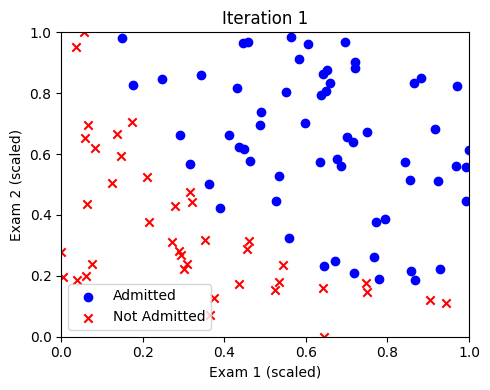

[ Iteration 100 ] cost = 0.5447456547891226


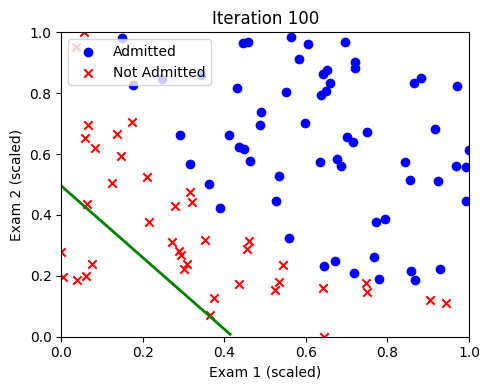

[ Iteration 200 ] cost = 0.47677856205978575


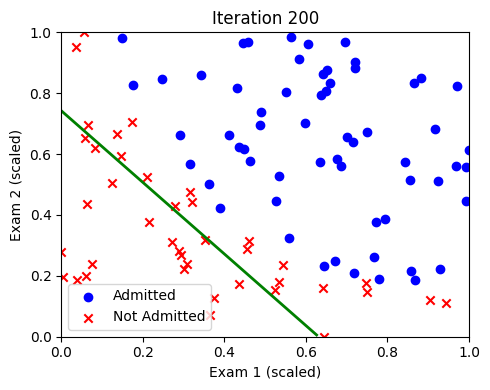

[ Iteration 300 ] cost = 0.43008973518168964


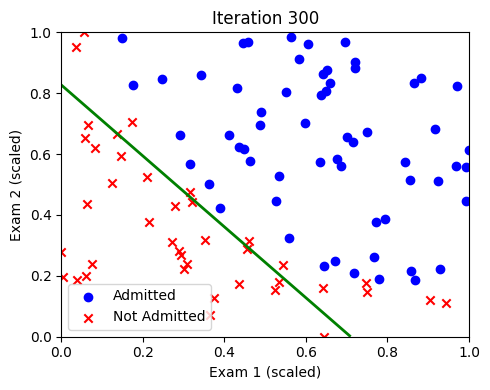

[ Iteration 400 ] cost = 0.39648633999926375


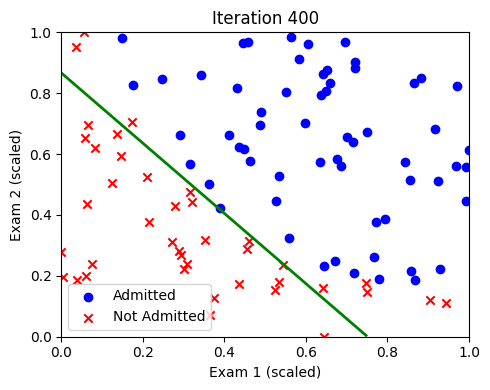

[ Iteration 500 ] cost = 0.3712778531197126


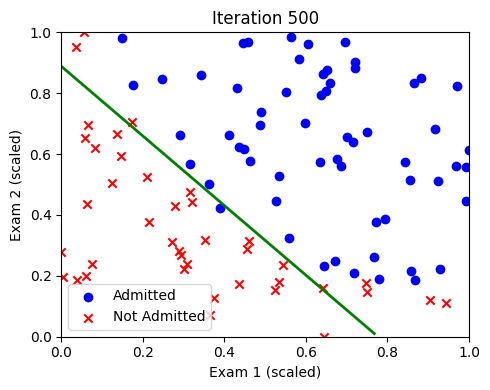

[ Iteration 600 ] cost = 0.351704141714703


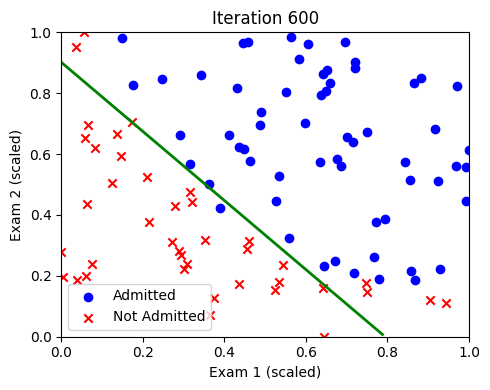

[ Iteration 700 ] cost = 0.33607129260111585


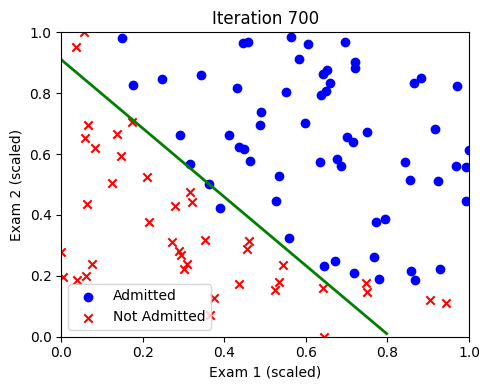

[ Iteration 800 ] cost = 0.3232942408488856


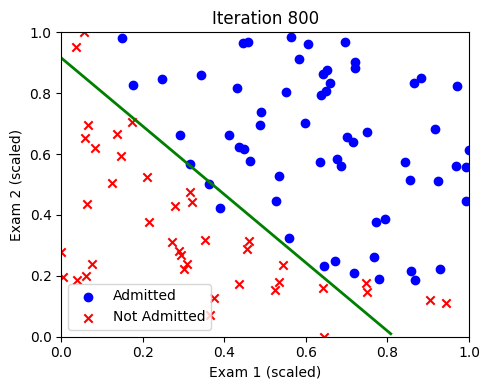

[ Iteration 900 ] cost = 0.3126501508237533


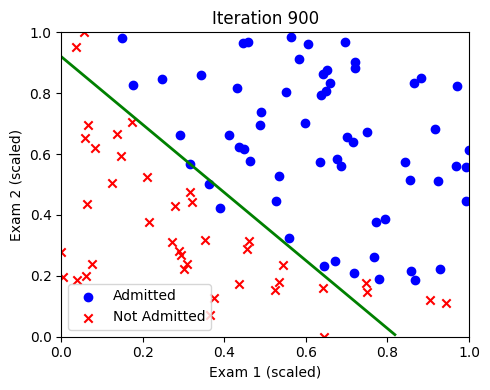

[ Iteration 1000 ] cost = 0.30364056847150683


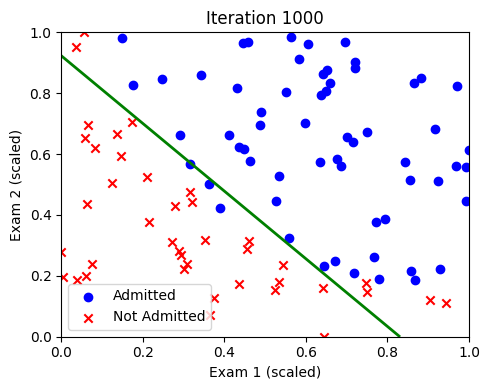


Training Accuracy: 91.0%


In [231]:

min_vals = train_X.min(axis=0)
max_vals = train_X.max(axis=0)
train_X_scaled = (train_X - min_vals) / (max_vals - min_vals)


#train_X_with_bias = np.column_stack([np.ones(len(train_X)), train_X])
train_X_with_bias = np.column_stack([np.ones(len(train_X_scaled)), train_X_scaled])
print(f"Data shape with bias: {train_X_with_bias.shape}")

initial_theta = np.array([0.002, 0.001, 0.001]) # you can change the intialization for better results
#initial_theta = np.random.randn(3) * 0.01
alpha_test = 0.2
max_iter = 1000
print_iter = 100

learned_theta = gradient_descent(initial_theta, train_X_with_bias, train_y, alpha_test, max_iter, print_iter)

def predict(theta, X):
    pass
    #  Predict labels using learned parameters
    # ****** ENTER CODE  ******
    probs = sigmoid(X @ theta)

    # apply threshold
    preds = (probs >= 0.5).astype(int)
    # ****** END CODE  ******
    return preds

def calculate_accuracy(theta, X, y):
    """ Calculate classification accuracy """
    predictions = predict(theta, X)
    accuracy = np.mean(predictions == y) * 100
    return accuracy

training_accuracy = calculate_accuracy(learned_theta, train_X_with_bias, train_y)
print(f"\nTraining Accuracy: {training_accuracy}%")

# One-Class SVM

**Purpose:**  
One-Class SVM (Support Vector Machine) is an **unsupervised learning algorithm** used for **anomaly detection** or **outlier detection**.

**Idea:**  
It tries to **learn the boundary of a single class** of “normal” data and identifies points that lie **outside this boundary** as anomalies.

**How it Works:**  
1. Maps input data into a **high-dimensional feature space** using a **kernel function** (commonly RBF).  
2. Finds a **hyperplane** (or hypersurface) that best **encloses the normal data**.  
3. Points outside this boundary are considered **outliers**.

**Key Parameters:**  
- `nu`: An upper bound on the fraction of outliers (controls sensitivity).  
- `kernel`: The function used to map data to higher dimensions.

# Credit Card Fraud Detection: 3D PCA Visualization

### Dataset
- Kaggle’s **Credit Card Fraud dataset** with transactions labeled as `0 = normal` and `1 = fraud`.  
- Features include `Time`, `Amount`, and 28 anonymized PCA components (`V1`–`V28`).  

### Steps in the Code
1. **Resampling:** Created a smaller dataset of 2000 transactions with a **70:30 ratio** of normal to fraud for better visualization.  
2. **Feature Preparation:** Separated features (`X`) and labels (`y_true`) and **standardized** features using `StandardScaler`.  
3. **Dimensionality Reduction:** Applied **PCA** to reduce features to 3 components for 3D plotting.  
4. **Visualization:** Plotted normal (blue) and fraud (red) transactions in 3D PCA space to observe patterns and class separation.  

### Purpose
- Helps visualize the distribution of normal vs. fraudulent transactions and provides intuition before applying anomaly detection or classification models like **One-Class SVM**.

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Reduced dataset size: 2000
Class
0    0.7
1    0.3
Name: proportion, dtype: float64


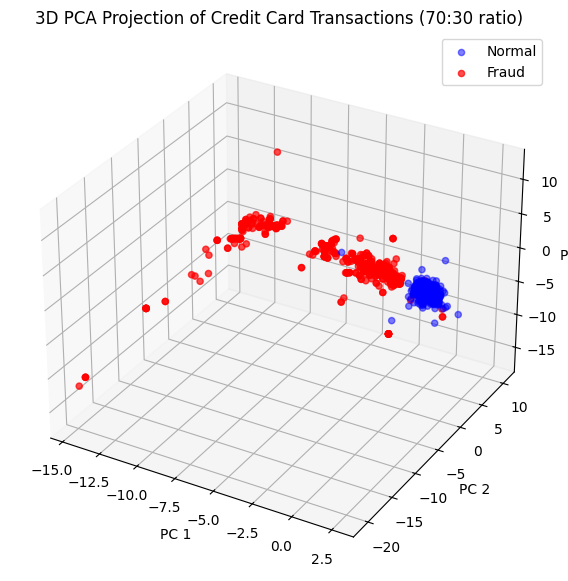

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots
from sklearn.utils import resample
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

    # 1. Load dataset from Kaggle
df = kagglehub.dataset_load(
        KaggleDatasetAdapter.PANDAS,
        "mlg-ulb/creditcardfraud",
        "creditcard.csv",
    )

# --- 1. Resample to 70:30 ratio ---
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

# target total size
target_total = 2000
target_fraud = int(0.3 * target_total)   # 30% fraud
target_normal = int(0.7 * target_total)  # 70% normal

fraud_resampled = resample(fraud, replace=True, n_samples=target_fraud, random_state=42)
normal_resampled = resample(normal, replace=False, n_samples=target_normal, random_state=42)

df_small = pd.concat([fraud_resampled, normal_resampled]).sample(frac=1, random_state=42)

print(f"Reduced dataset size: {len(df_small)}")
print(df_small["Class"].value_counts(normalize=True))

# --- 2. Features and labels ---
X = df_small.drop("Class", axis=1).values
y_true = df_small["Class"].values  # 0 = normal, 1 = fraud

# --- 3. Standardize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Reduce to 3D with PCA ---
pca = PCA(n_components=3, random_state=42)
X_3d = pca.fit_transform(X_scaled)

# --- 5. Plot in 3D ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[y_true == 0, 0], X_3d[y_true == 0, 1], X_3d[y_true == 0, 2],
           c='blue', alpha=0.5, label="Normal")
ax.scatter(X_3d[y_true == 1, 0], X_3d[y_true == 1, 1], X_3d[y_true == 1, 2],
           c='red', alpha=0.7, label="Fraud")

ax.set_title("3D PCA Projection of Credit Card Transactions (70:30 ratio)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend()
plt.show()

### One-Class SVM: Primal and Dual Form

The goal of a One-Class SVM is to **find a boundary around the normal data (inliers)** in a high-dimensional space. Formally, we want to find a hyperplane that separates most of the data from the origin in feature space $\phi(x)$.

#### Primal Formulation

$$
\min_{w, \rho, \xi} \quad \frac{1}{2} \|w\|^2 - \rho + \frac{1}{\nu n} \sum_{i=1}^n \xi_i
$$

subject to:

$$
w^\top \phi(x_i) \ge \rho - \xi_i, \quad \xi_i \ge 0
$$

**Where:**  

- $w$ = normal vector of the hyperplane  
- $\rho$ = offset / threshold  
- $\xi_i$ = slack variables (allow some points to lie outside the boundary)  
- $\nu \in (0,1]$ = upper bound on the fraction of outliers  

**Intuition:**  
- Minimize $\|w\|^2$ → keep the hyperplane “tight” around the data  
- Maximize $\rho$ → push the boundary away from the origin  
- Slack $\xi_i$ allows some points to be considered outliers  

---

#### Dual Formulation

Introducing Lagrange multipliers $\mu_i \ge 0$ for the constraints and solving gives the dual problem:

$$
\min_{\mu} \quad \frac{1}{2} \sum_{i,j} \mu_i \mu_j K(x_i, x_j)
$$

subject to:

$$
0 \le \mu_i \le \frac{1}{\nu n}, \quad \sum_i \mu_i = 1
$$

**Where:**  

- $K(x_i, x_j) = \phi(x_i)^\top \phi(x_j)$ is the **kernel function**  
- $\mu_i$ = dual coefficients associated with each training point  

**Intuition:**  
- The kernel trick allows computation in high-dimensional space without explicitly mapping $\phi(x)$  
- Constraints enforce that only a fraction $\nu$ of points can be outliers  
- $\sum_i \mu_i = 1$ ensures proper scaling of the hyperplane

# Programming Assignment: Kernel One-Class SVM  

##  Overview  
In this assignment, you will implement parts of a **Kernel-based One-Class SVM**.  
The goal is to learn how kernel methods and dual optimization are used to detect anomalies (outliers vs. inliers).  

We provide a partially completed class `KernelOneClassSVM` with:  
- Pre-written methods for optimization and training.  
- Clear function stubs and docstrings.  
- Comments showing exactly what you need to implement.  

 Your task is to **fill in the missing methods**

---

##  Class Provided  

The `KernelOneClassSVM` class contains the following methods:  

###  Already Implemented (Do NOT modify)  
- `__init__` → initializes the model with kernel parameters.  
- `fit` → fits the model by solving the dual optimization problem.  
- `score_samples` → computes anomaly scores using the decision function.  

###  To Implement (Your Task)  
The following functions must be completed by you:  

1. **`_kernel_function(self, X1, X2)`**  
   - Compute the kernel matrix between two datasets.  
   - Use Gaussian RBF:  

2. **`_objective(self, mu)`**  
   - Compute the dual objective function:  

3. **`_objective_gradient(self, mu)`**  
   - Compute the gradient of the dual objective:   

4. **`_compute_rho(self)`**  
   - Compute the threshold ρ using complementary slackness:  
     - For support vectors strictly inside bounds (0 < μᵢ < 1/(νn)):   
     - If none exist, take the average over all support vectors.  

5. **`decision_function(self, X)`**  
   - Compute decision values for test samples:   

6. **`predict(self, X)`**  
   - Predict labels based on decision values:   

---


In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import pairwise_distances
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

In [234]:

class KernelOneClassSVM:
    def __init__(self, kernel='rbf', gamma=0.1, nu=0.1, tol=1e-6):
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu
        self.tol = tol

        # These will be set during fitting
        self.X_train = None
        self.mu = None
        self.support_vectors = None
        self.support_indices = None
        self.rho = None
        self.K_train = None
    def _kernel_function(self, X1: np.ndarray, X2: np.ndarray) -> np.ndarray:
        #Compute kernel matrix between X1 and X2.

        #Parameters:
        #-----------
        #X1 : array-like, shape (n_samples_1, n_features)
        #X2 : array-like, shape (n_samples_2, n_features)
        sq_dist = pairwise_distances(X1, X2, metric='sqeuclidean')
        K = np.exp(-self.gamma * sq_dist)
        #Returns:
        #--------
        #K : array, shape (n_samples_1, n_samples_2)
        #    Kernel matrix
        #  Gaussian RBF kernel: exp(-γ||x_i - x_j||²)
        # ****** ENTER CODE  ******
        return K
        # ****** END CODE  ******
    def _objective(self, mu: np.ndarray) -> float:
        #   Parameters
        #     ----------
        #     mu : numpy.ndarray
        #         The vector of dual coefficients or optimization variables, with shape `(n_samples,)`.
        #     Returns
        #     -------
        #     float
        #         The scalar value of the dual objective function.
        #     Implementation Details
        #     --------------------
        #     The function calculates the objective using the formula:
        #     L(\mu) = \frac{1}{2} \mu^\top K \mu
        # ****** ENTER CODE  ******
        return 0.5 * mu @ self.K_train @ mu
        # ****** END CODE  ******

    def _objective_gradient(self, mu: np.ndarray) -> np.ndarray:
        # Parameters
        # ----------
        # mu : numpy.ndarray
        #     The vector of dual coefficients or optimization variables, with shape `(n_samples,)`.
        # Returns
        # -------
        # numpy.ndarray
        #     The computed gradient vector, with the same shape as `mu`, `(n_samples,)`.
        # # Gradient formula:
        # ∇_μ (1/2 * μ^T K μ) = K μ
        # ****** ENTER CODE  ******
        gradient = self.K_train @ mu

        return gradient
        # ****** END CODE  ******

    # No Changes To be Made in the fit  function
    def fit(self, X):
        #  Fit the One-Class SVM model.
        # Parameters
        # ----------
        # X : numpy.ndarray, shape (n_samples, n_features)
        #     The training data to be used for fitting the model.
        # Returns
        # -------
        # OneClassSVM
        #     Returns the instance of the class itself, allowing for method chaining.
        # Intitalize the data
        X = np.array(X)
        self.X_train = X
        n_samples = X.shape[0]
        # Compute kernel matrix
        self.K_train = self._kernel_function(X, X)

        # Set up optimization problem
        # Variables: μ (dual coefficients)
        mu_init = np.ones(n_samples) / n_samples  # Initialize to satisfy equality constraint

        # Bounds: 0 ≤ μᵢ ≤ 1/(ν*n)
        bounds = [(0, 1.0 / (self.nu * n_samples)) for _ in range(n_samples)]

        # Equality constraint: μᵀ1 = 1
        constraint = {
                'type': 'eq',
                'fun': lambda mu: np.sum(mu) - 1.0,
                'jac': lambda mu: np.ones(n_samples)
        }

            # Solve optimization problem
        result = minimize(
            fun=self._objective,
            x0=mu_init,
            method='SLSQP',
            jac=self._objective_gradient,
            bounds=bounds,
            constraints=constraint,
            options={'ftol': self.tol, 'disp': False}
        )
        if not result.success:
            print(f"Optimization warning: {result.message}")
        self.mu = result.x
        self.support_indices = np.where(self.mu > self.tol)[0]
        self.support_vectors = X[self.support_indices]
        mu_support = self.mu[self.support_indices]
        # Compute ρ using complementary slackness
        # For support vectors with 0 < μᵢ < 1/(ν*n), we have ⟨w,xᵢ⟩ = ρ
        self._compute_rho()

        return self

    def _compute_rho(self):
        # Compute the threshold ρ using complementary slackness conditions.
        # This threshold defines the boundary of the decision function. Data points are
        # classified as inliers or outliers based on their position relative to this threshold.
        # The value of rho is computed based on the support vectors found during optimization.
        # - For support vectors strictly inside bounds (0 < μ_i < 1/(ν*n)):
        #  ρ = Σ μ_j K(x_j, x_i)
        # - If none satisfy, take the average decision over all support vectors.
        #Steps:
        #1. Compute the upper bound for μᵢ, which is 1 / (ν * n).
        #2. Identify support vectors where μᵢ lies strictly between (tol, upper_bound - tol).
        #These are the margin support vectors.
        #3. If such support vectors exist:
            #- Pick one (e.g., the first).
             # - Compute ρ as Σ μⱼ K(xⱼ, xᵢ).
        #4. If none exist:
            #- Fall back to computing ρ as the average decision value over all support vectors.
            # set self.rho no need to return anything
        n_samples = len(self.X_train)
        upper_bound = 1.0 / (self.nu * n_samples)

        # Find support vectors that are strictly between bounds
        mask = (self.mu > self.tol) & (self.mu < upper_bound - self.tol)

        # ****** ENTER CODE  ******
        if np.any(mask):
            i = np.where(mask)[0][0]   # pick first margin SV
            self.rho = np.sum(self.mu * self.K_train[:, i])
        else:
            # fallback: average over all SVs
            decision_vals = self.K_train @ self.mu
            self.rho = np.mean(decision_vals[self.support_indices])

        # ****** END CODE  ******


    def decision_function(self, X: np.ndarray) -> np.ndarray:
        # Parameters:
        # -----------
        # X : array-like, shape (n_samples, n_features)
        #     Test samples
        # Returns:
        # --------
        # decision : array, shape (n_samples,)
        #     Decision function values
        # Decision function formula:
        # f(x) = Σ μ_i K(x, x_i) - ρ
        # - Positive → inlier
        # - Negative → outlier
        if self.mu is None:
            raise ValueError("Model has not been fitted yet.")

        X = np.array(X)
        K = self._kernel_function(X, self.X_train)

        # ****** ENTER CODE  ******
        decision = K @ self.mu - self.rho
        return decision
        # ****** END CODE  ******

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Parameters:
        # -----------
        # X : array-like, shape (n_samples, n_features)
        #     Test samples
        # Returns:
        # y_pred : array, shape (n_samples,)
        #     Predicted labels (1 for inliers, -1 for outliers)
        # - Use decision_function(X)
        # - Apply threshold 0:
        #     decision >= 0 → inlier (1)
        #     decision < 0 → outlier (-1)
        # Predicted labels (1 for inliers, -1 for outliers) is an array
        # ****** ENTER CODE  ******
        decision = self.decision_function(X)
        y_pred = np.where(decision >= 0, 1, -1)
        return y_pred
        # ****** END CODE  ******
    def score_samples(self, X):
        """
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        Returns:
        --------
        scores : array, shape (n_samples,)
            Anomaly scores
        """
        return self.decision_function(X)



X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_true, test_size=0.3, random_state=42, stratify=y_true
    )





In [235]:
grader.check("q5")

q5 results: All test cases passed!

In [236]:
X_train_normal = X_train[y_train == 0]
model = KernelOneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
model.fit(X_train_normal)


y_pred = model.predict(X_test)
    # Convert One-Class SVM outputs (-1 = anomaly, +1 = inlier) → fraud = 1, normal = 0
y_pred_binary = np.where(y_pred == -1, 1, 0)

    # 9. Evaluation
print("\n=== Evaluation on Test Set ===")
print(confusion_matrix(y_test, y_pred_binary))
report = classification_report(y_test, y_pred_binary, digits=4)
print(report)
recall = recall_score(y_test, y_pred_binary, average='macro')   # or 'weighted', 'micro', None
print("Recall:", recall)


=== Evaluation on Test Set ===
[[361  59]
 [ 28 152]]
              precision    recall  f1-score   support

           0     0.9280    0.8595    0.8925       420
           1     0.7204    0.8444    0.7775       180

    accuracy                         0.8550       600
   macro avg     0.8242    0.8520    0.8350       600
weighted avg     0.8657    0.8550    0.8580       600

Recall: 0.8519841269841271


In [237]:
grader.check("q6")

q6 results: All test cases passed!

Do not need to change the below function it is used to - demonstrate the use of a custom **Kernel One-Class SVM** for anomaly detection on credit card fraud data, including 3D visualization using PCA and evaluation on a test set.

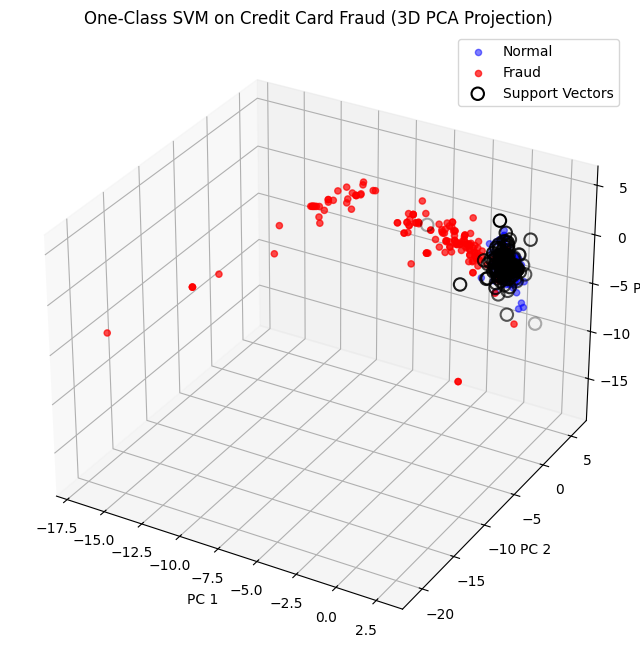

In [238]:
from sklearn.model_selection import train_test_split
def plot_ocsvm_results_3d(X, y_true, model, title="One-Class SVM Results (3D)"):
    """
    Visualize One-Class SVM results in 3D using PCA for dimensionality reduction.
    Decision boundary is approximated via grid sampling.
    """
    # Reduce to 3D
    pca = PCA(n_components=3, random_state=42)
    X_3d = pca.fit_transform(X)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of inliers/outliers
    inliers_mask = y_true == 0
    outliers_mask = y_true == 1

    ax.scatter(X_3d[inliers_mask, 0], X_3d[inliers_mask, 1], X_3d[inliers_mask, 2],
               c="blue", alpha=0.5, label="Normal")
    ax.scatter(X_3d[outliers_mask, 0], X_3d[outliers_mask, 1], X_3d[outliers_mask, 2],
               c="red", alpha=0.7, label="Fraud")

    # Support vectors (projected in 3D)
    if len(model.support_indices) > 0:
        support_proj = pca.transform(model.X_train[model.support_indices])
        ax.scatter(support_proj[:, 0], support_proj[:, 1], support_proj[:, 2],
                   facecolors="none", edgecolors="black", s=80, linewidth=1.5,
                   label="Support Vectors")

    # Approximate decision boundary using a 3D grid
    grid_size = 20  # reduce if too slow
    x_min, x_max = X_3d[:, 0].min() - 1, X_3d[:, 0].max() + 1
    y_min, y_max = X_3d[:, 1].min() - 1, X_3d[:, 1].max() + 1
    z_min, z_max = X_3d[:, 2].min() - 1, X_3d[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        np.linspace(z_min, z_max, grid_size)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    # Project grid back to original space
    grid_original = pca.inverse_transform(grid_points)
    scores = model.decision_function(grid_original)
    scores = scores.reshape(xx.shape)

    # Plot isosurface (decision boundary at 0)
    try:
        from skimage import measure
        verts, faces, _, _ = measure.marching_cubes(scores, level=0)
        verts_transformed = np.c_[xx.ravel()[verts[:, 0].astype(int)],
                                  yy.ravel()[verts[:, 1].astype(int)],
                                  zz.ravel()[verts[:, 2].astype(int)]]
        ax.plot_trisurf(verts_transformed[:, 0], verts_transformed[:, 1],
                        faces, verts_transformed[:, 2], color="cyan", alpha=0.15)
    except Exception as e:
        print("⚠️ Could not render 3D boundary surface:", e)

    ax.set_title(title)
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.legend()
    plt.show()

plot_ocsvm_results_3d(X_test, y_test, model,
title="One-Class SVM on Credit Card Fraud (3D PCA Projection)")

# Pima Indians Diabetes Dataset

The **Pima Indians Diabetes dataset** is a well-known medical dataset from the **National Institute of Diabetes**.  
It is frequently used for **binary classification tasks** in machine learning.

---

## Dataset Overview

- **Samples (rows):** 768 female patients (age ≥ 21)  
- **Features (columns):** 8 health-related attributes  
- **Target (label):** Binary outcome  
  - `0` → No diabetes  
  - `1` → Diabetes  

---

## Features

| Feature        | Description                               |
|----------------|-------------------------------------------|
| Pregnancies    | Number of times pregnant                  |
| Glucose        | Plasma glucose concentration              |
| BloodPressure  | Diastolic blood pressure (mm Hg)          |
| SkinThickness  | Triceps skinfold thickness (mm)           |
| Insulin        | 2-Hour serum insulin (mu U/ml)            |
| BMI            | Body mass index (weight/height²)          |
| DiabetesPedigreeFunction | Diabetes pedigree function       |
| Age            | Age in years                              |

---

## Data Loading Steps

1. Dataset is **downloaded directly** from GitHub.  
2. **Column names** are assigned (since the raw file has none).  
3. Data is loaded into a **pandas DataFrame**.  
4. **Basic info** is printed:  
   - Shape of dataset  
   - Feature names  
   - Class distribution  
5. Data is split into:  
   - **Features (X)** → NumPy array  
   - **Target labels (y)** → NumPy array  

---

## Summary

- Dataset contains **768 samples** with **8 input features**.  
- Target is **binary (0/1)** for diabetes diagnosis.  
- No preprocessing applied yet (raw form).  

---

In [239]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import requests
from io import StringIO
from typing import Dict, Any, Union


def load_pima_diabetes_data():
    """Load the Pima Indians Diabetes dataset as-is"""
    # UCI dataset URL
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

    # Column names for Pima Indians Diabetes dataset
    columns = [
        'pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
        'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome'
    ]

    # Download with requests (disable SSL verify to avoid cert issues)
    print("Downloading Pima Indians Diabetes dataset...")
    response = requests.get(url, verify=False)
    if response.status_code != 200:
        raise Exception(f"Failed to download dataset, status code {response.status_code}")

    # Convert response content to DataFrame
    data = pd.read_csv(StringIO(response.text), names=columns)
    print(f"Successfully loaded {len(data)} samples")

    # Display basic info about the dataset
    print(f"\nDataset shape: {data.shape}")
    print(f"Feature columns: {columns[:-1]}")
    print(f"Target column: {columns[-1]}")
    print(f"Class distribution: {data['outcome'].value_counts().sort_index().values}")

    # Separate features and target - NO preprocessing, use raw data
    X = data.drop('outcome', axis=1).values
    y = data['outcome'].values

    return X, y, columns[:-1]

# Decision Tree from Scratch

In this section, we will implement **two core functions** used in building a Decision Tree:

1. **Gini Impurity**  
   - Measures how mixed the classes are in a node.  
   - A pure node (all samples same class) has **Gini = 0**.  

2. **Best Split**  
   - For each feature and threshold, split the data into left/right subsets.  
   - Compute **weighted Gini impurity** of the split.  
   - Choose the feature and threshold with the **lowest impurity**.  


In [240]:
from typing import Dict, Any, Union
class DecisionTreeFromScratch:
    def __init__(self, criterion="gini", max_depth=5, min_samples_split=2):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def gini_impurity(self, y: np.ndarray) -> float:
        # Compute the Gini impurity for labels y.
        # Parameters
        # ----------
        # y : numpy.ndarray, shape (n_samples,)
        #     The array of class labels for which to compute the impurity.

        # Returns
        # -------
        # float
        #     The computed Gini impurity, a value between 0 and 1. A value of 0 indicates
        #     a pure node (all samples belong to the same class), while a higher value
        #     indicates greater impurity.
        # Formula: Gini(y) = 1 - Σ p(c)^2
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        # ****** ENTER CODE  ******
        probs = counts / counts.sum()
        gini = 1 - np.sum(probs**2)

        return gini
        # ****** END CODE  ******

    def _best_split(self, X: np.ndarray, y: np.ndarray) -> tuple[int, float | None]:
        # Find the best split of data based on Gini impurity.
        # Parameters
        # ----------
        # X : numpy.ndarray, shape (n_samples, n_features)
        #     The feature matrix of the dataset.
        # y : numpy.ndarray, shape (n_samples,)
        #     The target labels corresponding to the samples in `X`.

        # Returns
        # -------
        # tuple[int, float | None]
        #     A tuple containing the index of the best feature to split on and the
        #     corresponding threshold value.
        # You have to implement weighted gini impurity
        n_samples, n_features = X.shape
        best_score = float("inf")
        best_feat, best_thresh = None, None

        for feat in range(n_features):
            thresholds = np.unique(X[:, feat])
            for thresh in thresholds:
                left_mask = X[:, feat] <= thresh
                right_mask = ~left_mask

                y_left, y_right = y[left_mask], y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Weighted Gini impurity
                # ****** ENTER CODE  ******
                score = (
                    (len(y_left) / n_samples) * self.gini_impurity(y_left)
                    + (len(y_right) / n_samples) * self.gini_impurity(y_right)
                )
                # ****** END CODE  ******

                if score < best_score:
                    best_score, best_feat, best_thresh = score, feat, thresh

        return best_feat, best_thresh




    def _build(self, X: np.ndarray, y: np.ndarray, depth: int, parent_label: int) -> Dict[str, Any]:
        """Recursively build the decision tree."""
        if len(y) == 0:
            return {"leaf": True, "label": parent_label}

        if (depth >= self.max_depth or len(y) < self.min_samples_split or
            len(np.unique(y)) == 1):
            label = np.bincount(y).argmax()
            return {"leaf": True, "label": label}

        feat, thresh = self._best_split(X, y)
        if feat is None:
            label = np.bincount(y).argmax()
            return {"leaf": True, "label": label}

        left_mask = X[:, feat] <= thresh
        right_mask = ~left_mask
        label = np.bincount(y).argmax()

        return {
            "leaf": False,
            "feature": feat,
            "thresh": thresh,
            "left": self._build(X[left_mask], y[left_mask], depth + 1, label),
            "right": self._build(X[right_mask], y[right_mask], depth + 1, label)
        }

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Fit the decision tree to data X and labels y."""
        parent_label = np.bincount(y).argmax()
        self.tree = self._build(X, y, 0, parent_label)

    def _predict_one(self, node: Dict[str, Any], x: np.ndarray) -> int:
        """Predict the label for a single input sample."""
        if node["leaf"]:
            return node["label"]

        if x[node["feature"]] <= node["thresh"]:
            return self._predict_one(node["left"], x)
        else:
            return self._predict_one(node["right"], x)

    def predict(self,X: np.ndarray) -> np.ndarray:
        """Predict labels for all samples in dataset X."""
        return np.array([self._predict_one(self.tree, x) for x in X])

In [241]:
grader.check("q7")

q7 results: All test cases passed!

# Implementing K-Nearest Neighbors (KNN) from Scratch

In this assignment, you will implement the **K-Nearest Neighbors (KNN)** classification

---

## Background

KNN is a **lazy learning algorithm** that makes predictions for a new data point by looking at the *k* closest training examples (neighbors) in feature space. The predicted label is decided by **majority vote** among the neighbors.

Steps:
1. Store the training data.
2. For each test sample:
   - Compute the distance to each training sample.
   - Identify the `k` nearest neighbors.
   - Collect their labels and perform majority voting.
3. Return the predicted label.

---

## Your Task

We provide you with a class `KNNFromScratch` containing function stubs.  
You must complete the missing implementation of the following function.


- **`predict`**: For each test point, compute distances, pick `k` nearest neighbors, and perform majority voting.

---

In [242]:
class KNNFromScratch:
    def __init__(self, k=3, metric="euclidean"):
        self.k = k
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _distance(self, a, b):
        if self.metric == "euclidean":
            return np.sqrt(np.sum((a - b) ** 2))
        elif self.metric == "manhattan":
            return np.sum(np.abs(a - b))
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

    def predict(self, X_test):
        """
        Hints:
        1. For each test sample, compute the distance to every training sample.
        2. Sort the distances and pick the indices of the k nearest neighbors.
        3. Collect the labels of these k nearest neighbors.
        4. Use majority voting to decide the final predicted label.
        5. Store the prediction and repeat for all test samples.
        """
        predictions = []
        for test_point in X_test:
            # ****** ENTER CODE  ******
            distances = [self._distance(test_point, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_labels = [self.y_train[i] for i in k_indices]
            labels, counts = np.unique(k_labels, return_counts=True)
            most_common_label = labels[np.argmax(counts)]
            predictions.append(most_common_label)
            # ****** END CODE  ******
        return np.array(predictions)

In [243]:
grader.check("q8")

q8 results: All test cases passed!

The programming section of this assignment is now complete.
From this point onward, you only need to answer the theory questions in the designated Markdown cells.
## Do not modify any of the provided code cells beyond this point.

Successfully loaded 768 samples

Dataset shape: (768, 9)
Feature columns: ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age']
Target column: outcome
Class distribution: [500 268]


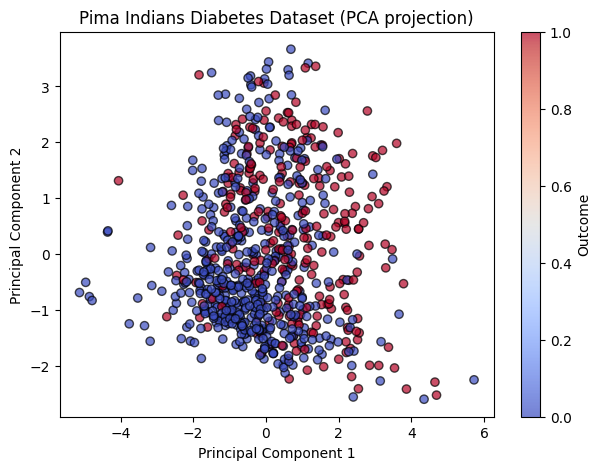

In [244]:


# ---------------------------
# Load dataset
# ---------------------------
X, y, feature_names = load_pima_diabetes_data()

# ---------------------------
# PCA visualization (2D)
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.title("Pima Indians Diabetes Dataset (PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Outcome")
plt.show()



## Theory Question 2

Looking at the **visualization of the decision boundaries**,  
which model do you think would provide a better fit among all the models we implemented from scratch?

- **Logistic Regression** .  
- **Decision Tree**
- **K-Nearest Neighbors (KNN)**
- **One Class SVM (OCSVM)**

Based on the visualization, discuss which model fits the dataset best and **why**.

# Explanation : Please write your answer here ....

Among the models implemented from scratch, the Decision Tree algorithm would likely provide the best fit for this dataset. The visualization shows that the classes are not linearly separable, which makes models like Logistic Regression (designed for linear boundaries) unsuitable. Similarly, One-Class SVM is primarily intended for anomaly detection rather than separating two overlapping classes, so it does not apply well here.

While K-Nearest Neighbors (KNN) can handle non-linear boundaries, its effectiveness depends heavily on the choice of k. With a small value (e.g., k = 3), the model may suffer from bias and sensitivity to noise, especially in regions where the data points are densely packed and overlapping such as this case. This increases the risk of misclassifying new points due to local crowding of different classes.

In contrast, the Decision Tree algorithm recursively evaluates features at each node, allowing it to capture more complex and non-linear class boundaries. This makes it better suited for datasets like this one, where class separation requires flexible, non-linear decision rules.


In [245]:
def gradient_descent(theta, X, y, alpha, max_iterations):
    """ Batch gradient descent algorithm """
    iteration = 0
    prev_cost = float('inf')  # Track previous cost

    while iteration < max_iterations:
        iteration += 1
        # Update step
        gradient = gradient_update(theta, X, y)
        theta = theta - alpha * gradient

    return theta


In [246]:
if __name__ == "__main__":
    print("Loading Pima Indians Diabetes Dataset...")
    X, y, feature_names = load_pima_diabetes_data()
    print(f"Dataset shape: {X.shape}")
    print(f"Features: {feature_names}")
    print(f"Classes distribution: {np.bincount(y)} (0=No Diabetes, 1=Diabetes)")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Initialize models
    models = {
        'Decision Tree': DecisionTreeFromScratch(max_depth=10),
        'KNN': KNNFromScratch(k=7),
        'Logistic Regression': None,  # We’ll run separately with your gradient descent
    }

    # Train and evaluate Decision Tree & KNN
    for name, model in models.items():
        if model is None:
            continue
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")

    # Run Logistic Regression with Gradient Descent
    print("\nRunning Logistic Regression (from scratch)...")
    train_X_with_bias = np.column_stack([np.ones(len(X_train)), X_train])
    test_X_with_bias = np.column_stack([np.ones(len(X_test)), X_test])

    initial_theta = np.zeros(train_X_with_bias.shape[1])
    alpha_test = 0.01
    max_iter = 10000


    learned_theta = gradient_descent(initial_theta, train_X_with_bias, y_train,
                                     alpha_test, max_iter)

    y_pred_logreg = (sigmoid(np.dot(test_X_with_bias, learned_theta)) >= 0.5).astype(int)
    logreg_acc = accuracy_score(y_test, y_pred_logreg)
    print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")

    # One-Class SVM (treat class 0 as "normal", detect class 1 as anomaly)
    print("\nRunning One-Class SVM...")
    X_train_normal = X_train[y_train == 0]  # only healthy patients for training
    ocsvm = KernelOneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
    ocsvm.fit(X_train_normal)

    y_pred_ocsvm = ocsvm.predict(X_test)
    # Map OCSVM output: +1 = inlier (normal), -1 = outlier (diabetes)
    y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)

    ocsvm_acc = accuracy_score(y_test, y_pred_ocsvm)
    print(f"One-Class SVM Accuracy: {ocsvm_acc:.4f}")


Loading Pima Indians Diabetes Dataset...
Successfully loaded 768 samples

Dataset shape: (768, 9)
Feature columns: ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age']
Target column: outcome
Class distribution: [500 268]
Dataset shape: (768, 8)
Features: ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age']
Classes distribution: [500 268] (0=No Diabetes, 1=Diabetes)

Training Decision Tree...
Decision Tree Accuracy: 0.7706

Training KNN...
KNN Accuracy: 0.7403

Running Logistic Regression (from scratch)...
Logistic Regression Accuracy: 0.6061

Running One-Class SVM...
One-Class SVM Accuracy: 0.3506


# Theory Question 3

Give the **ascending order of the accuracy** values printed for you,  
and explain the results.  

 *Hint:* Use the visualizations from the above cells to support your explanation.  

---

### Reflection
- Did this **match what you initially predicted** based on the plots?  
- If **yes** → briefly explain why the results align with the help of visual boundaries.  
- If **no** → identify which model’s performance did not match your expectation,  
  and think of possible reasons and explain them

# Explanation: Please write your answer here ....


1. One-class SVM (accuracy = 0.3506)
2. Logistic Regression (accuracy = 0.6061)
3. KNN Accurcay (accuracy = 0.7403)
4. Decision Tree (accuracy = 0.7706)

Yes, the results matched what I initially predicted based on the plots. From the visualization, it’s clear that many of the data points overlap, which means a more thorough classification method is needed. In this case, the decision tree performs better because it evaluates each feature step by step, allowing it to handle complex, non-linear decision boundaries more effectively.

Initially, I also thought logistic regression might perform reasonably well. However, logistic regression assumes linear separability, which is not the case here, so its performance suffers. KNN, on the other hand, relies on majority voting among the k nearest neighbors. While this can work for moderately separated data, in this dataset the heavy overlap between classes means that neighboring points often belong to different classes. This makes KNN highly sensitive to the choice of k and increases the likelihood of misclassification when new points are tested.

Overall, the results confirmed that decision trees are more suited to this dataset compared to logistic regression, one-class SVM, or KNN, since they can capture the non-linear and overlapping nature of the class distributions more effectively.